# Combined_data analysing before KNIME

In [112]:
import matplotlib.pyplot as plt
from matplotlib import pyplot
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [103]:
import pandas as pd
pinkFlam = pd.read_csv ('combined-data.csv')
pinkFlam = pinkFlam.rename(columns=lambda x: x.strip())

In [104]:
pinkFlam

,userId,userSessionId,teamLevel,platformType,count_gameclicks,count_hits,count_buyId,avg_price
0,812,5648,1,android,69,8,NaN,NaN
1,1658,5649,1,iphone,31,5,NaN,NaN
2,1589,5650,1,iphone,26,2,NaN,NaN
3,1863,5651,1,android,35,4,NaN,NaN
4,937,5652,1,android,39,0,1.0,1.0
...,...,...,...,...,...,...,...,...
4614,1399,37261,6,mac,28,3,1.0,2.0
4615,248,37491,3,iphone,108,11,2.0,10.0
4616,981,38321,6,iphone,36,9,1.0,10.0
4617,1575,38602,3,android,11,0,NaN,NaN


## EDA

In [105]:
pinkFlam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4619 entries, 0 to 4618
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userId            4619 non-null   int64  
 1   userSessionId     4619 non-null   int64  
 2   teamLevel         4619 non-null   int64  
 3   platformType      4619 non-null   object 
 4   count_gameclicks  4619 non-null   int64  
 5   count_hits        4619 non-null   int64  
 6   count_buyId       1411 non-null   float64
 7   avg_price         1411 non-null   float64
dtypes: float64(2), int64(5), object(1)
memory usage: 288.8+ KB


In [106]:
unique_users = pinkFlam['userId'].nunique()
print(f"Number of players: {unique_users}")

Number of players: 1091


In [107]:
print('Sessions with Purchases : ' + str(pinkFlam['avg_price'].count()) + ' from  the total sessions : ' + str(pinkFlam['userId'].count()))

Sessions with Purchases : 1411 from  the total sessions : 4619


array([[<Axes: title={'center': 'avg_price'}>]], dtype=object)

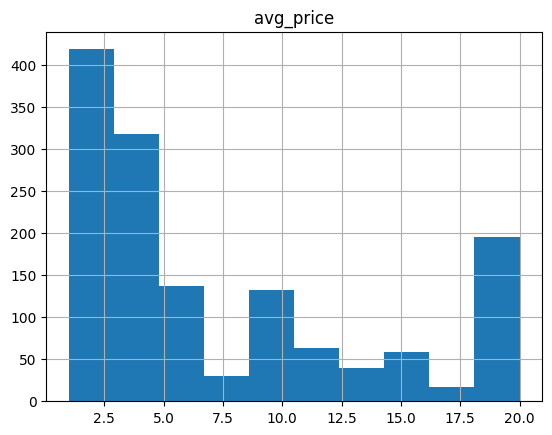

In [108]:
pd.DataFrame.hist(pinkFlam[['avg_price']])

In [109]:
# Remove rows with NULL
pinkFlam.replace("", np.nan, inplace=True)
pinkFlam = pinkFlam[np.isfinite(pinkFlam['count_buyId'])]
pinkFlam

,userId,userSessionId,teamLevel,platformType,count_gameclicks,count_hits,count_buyId,avg_price
4,937,5652,1,android,39,0,1.0,1.0
11,1623,5659,1,iphone,129,9,1.0,10.0
13,83,5661,1,android,102,14,1.0,5.0
17,121,5665,1,android,39,4,1.0,3.0
18,462,5666,1,android,90,10,1.0,3.0
...,...,...,...,...,...,...,...,...
4596,2052,35370,3,linux,119,14,1.0,1.0
4597,2316,35475,4,iphone,190,21,1.0,5.0
4614,1399,37261,6,mac,28,3,1.0,2.0
4615,248,37491,3,iphone,108,11,2.0,10.0


In [111]:
pinkFlam['total_price'] = pinkFlam['avg_price'] * pinkFlam['count_buyId']
total_revenue = pinkFlam['total_price'].sum()

print(f"Total Revenue: {total_revenue}")

Total Revenue: 21406.3668


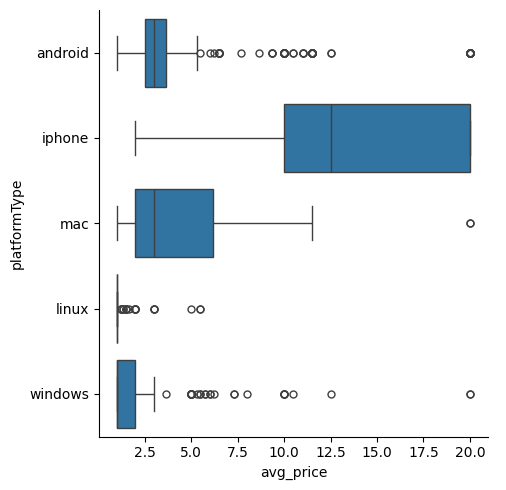

In [113]:
sns.catplot(x="avg_price",y="platformType",kind='box',data=pinkFlam)

Cột nền tảng chỉ gồm 5 giá trị nên ta visualize và đã thấy được yếu tố tác động lớn vào avg_price.

---



In [114]:
pinkFlam.replace("", np.nan, inplace=True)
pinkFlam = pinkFlam[np.isfinite(pinkFlam['count_buyId'])]
pinkFlam['user_category'] = np.where(pinkFlam['avg_price']> 5, 'HighRollers', 'PennyPinchers')
pinkFlam

,userId,userSessionId,teamLevel,platformType,count_gameclicks,count_hits,count_buyId,avg_price,total_price,user_category
4,937,5652,1,android,39,0,1.0,1.0,1.0,PennyPinchers
11,1623,5659,1,iphone,129,9,1.0,10.0,10.0,HighRollers
13,83,5661,1,android,102,14,1.0,5.0,5.0,PennyPinchers
17,121,5665,1,android,39,4,1.0,3.0,3.0,PennyPinchers
18,462,5666,1,android,90,10,1.0,3.0,3.0,PennyPinchers
...,...,...,...,...,...,...,...,...,...,...
4596,2052,35370,3,linux,119,14,1.0,1.0,1.0,PennyPinchers
4597,2316,35475,4,iphone,190,21,1.0,5.0,5.0,PennyPinchers
4614,1399,37261,6,mac,28,3,1.0,2.0,2.0,PennyPinchers
4615,248,37491,3,iphone,108,11,2.0,10.0,20.0,HighRollers


<Axes: xlabel='platformType', ylabel='count_gameclicks'>

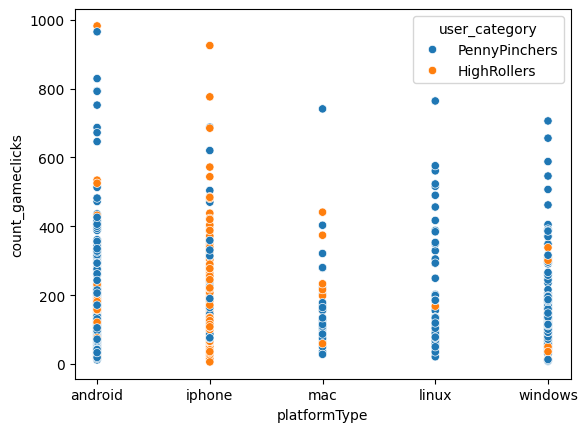

In [115]:
sns.scatterplot(x='platformType',y='count_gameclicks',hue='user_category',data=pinkFlam)

<Axes: xlabel='platformType', ylabel='count'>

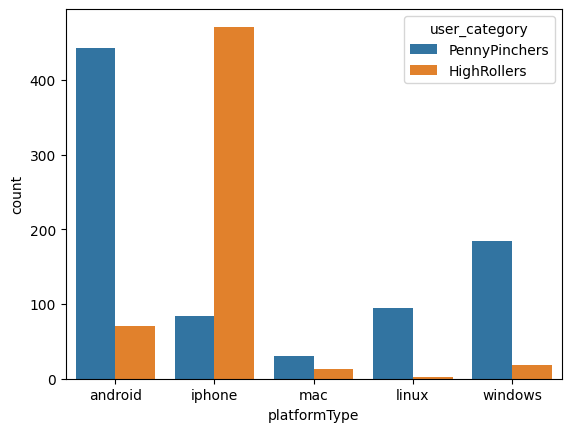

In [116]:
sns.countplot(x="platformType", hue="user_category", data=pinkFlam)

In [117]:
# Simplify the dataframe
pinkFlam = pinkFlam.drop(['userId' , 'userSessionId' , 'avg_price'], axis = 1)
pinkFlam.head()

,teamLevel,platformType,count_gameclicks,count_hits,count_buyId,total_price,user_category
4,1,android,39,0,1.0,1.0,PennyPinchers
11,1,iphone,129,9,1.0,10.0,HighRollers
13,1,android,102,14,1.0,5.0,PennyPinchers
17,1,android,39,4,1.0,3.0,PennyPinchers
18,1,android,90,10,1.0,3.0,PennyPinchers


In [118]:
pinkFlam_Project_summary = pinkFlam.describe()
pinkFlam_Project_summary = pinkFlam_Project_summary.T
pinkFlam_Project_summary

,count,mean,std,min,25%,50%,75%,max
teamLevel,1411.0,4.834160,1.791468,1.0,4.0,5.0,6.0,7.0
count_gameclicks,1411.0,145.234585,119.762914,6.0,80.0,109.0,162.5,982.0
count_hits,1411.0,16.758327,13.565930,0.0,9.0,13.0,20.0,100.0
count_buyId,1411.0,1.683203,0.900509,1.0,1.0,1.0,2.0,6.0
total_price,1411.0,12.040524,12.834785,1.0,3.0,6.0,20.0,100.0


In [119]:
numeric_cols = pinkFlam.select_dtypes(include=[np.number]).columns
pinkFlam_grouped = pinkFlam.groupby('platformType')[numeric_cols].mean()
pinkFlam_grouped

,teamLevel,count_gameclicks,count_hits,count_buyId,total_price
platformType,,,,,
android,4.769981,144.284600,16.062378,1.654971,6.676452
iphone,4.915315,142.816216,17.401802,1.684685,21.975135
linux,4.354167,157.604167,17.510417,1.666667,2.187292
mac,5.045455,165.090909,18.363636,1.613636,7.931818
windows,4.955665,144.093596,16.054187,1.773399,3.985123


=> Số lượt clicks và số lượt hits của các nền tảng là như nhau => count_gameclicks và count_hít ko ảnh hưởng nhiều việc phân loại.

## Data Preparing for Models testing

In [120]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
label_encoder = enc.fit(pinkFlam['platformType'])
print ("Categorical classes:", label_encoder.classes_)
integer_classes = label_encoder.transform(label_encoder.classes_)
print ("Integer classes:", integer_classes)
t = label_encoder.transform(pinkFlam['platformType'])
pinkFlam['EncPlatformType'] = t

Categorical classes: ['android' 'iphone' 'linux' 'mac' 'windows']
Integer classes: [0 1 2 3 4]


In [122]:
pinkFlam

,teamLevel,platformType,count_gameclicks,count_hits,count_buyId,total_price,user_category,EncPlatformType
4,1,android,39,0,1.0,1.0,PennyPinchers,0
11,1,iphone,129,9,1.0,10.0,HighRollers,1
13,1,android,102,14,1.0,5.0,PennyPinchers,0
17,1,android,39,4,1.0,3.0,PennyPinchers,0
18,1,android,90,10,1.0,3.0,PennyPinchers,0
...,...,...,...,...,...,...,...,...
4596,3,linux,119,14,1.0,1.0,PennyPinchers,2
4597,4,iphone,190,21,1.0,5.0,PennyPinchers,1
4614,6,mac,28,3,1.0,2.0,PennyPinchers,3
4615,3,iphone,108,11,2.0,20.0,HighRollers,1


## Predict

In [123]:
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn import neighbors

clf1 = tree.DecisionTreeClassifier()
clf2 = GaussianNB()
clf3 = neighbors.KNeighborsClassifier()
clf4 = svm.SVC()

X = pinkFlam[['teamLevel' ,'count_gameclicks' , 'count_hits','count_buyId' , 'EncPlatformType']][0:846]
Y = pinkFlam['user_category'][0:846]

# Train
clf1 = clf1.fit(X,Y)
clf2 = clf2.fit(X,Y)
clf3 = clf3.fit(X,Y)
clf4 = clf4.fit(X,Y)


# Test data
X_test = pinkFlam[['teamLevel' ,'count_gameclicks' , 'count_hits','count_buyId' , 'EncPlatformType']][846:1411]
Y_test = pinkFlam['user_category'][846:1411]


Y_prediction1 = clf1.predict(X_test)
Y_prediction2 = clf2.predict(X_test)
Y_prediction3 = clf3.predict(X_test)
Y_prediction4 = clf4.predict(X_test)

# Compare their reusults and print the best one!
print("Prediction for Decision Tree : ",accuracy_score(Y_test,Y_prediction2))
print("Accuracy for Naive Bayes : ",accuracy_score(Y_test,Y_prediction1))
print("Accuracy for K neighbors : ",accuracy_score(Y_test,Y_prediction3))
print("Accuracy for SVM : ",accuracy_score(Y_test,Y_prediction4))

Prediction for Decision Tree :  0.8017699115044248
Accuracy for Naive Bayes :  0.7893805309734513
Accuracy for K neighbors :  0.536283185840708
Accuracy for SVM :  0.5716814159292035


### Focus on Decision Tree

In [124]:
Y_prediction  = clf1.predict(X_test)
np.unique(Y_prediction)
pinkFlam_evaluation = pinkFlam[846:1411]
pinkFlam_evaluation['Predicted_UserCategory'] = Y_prediction
pinkFlam_evaluation[['Predicted_UserCategory' , 'user_category' ]]
y_true = pinkFlam_evaluation['user_category']
y_pred = pinkFlam_evaluation['Predicted_UserCategory']

In [125]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix([0, 1, 0, 1], [1, 1, 1, 0]).ravel()

Text(0.5, 23.52222222222222, 'Predicted User Category')

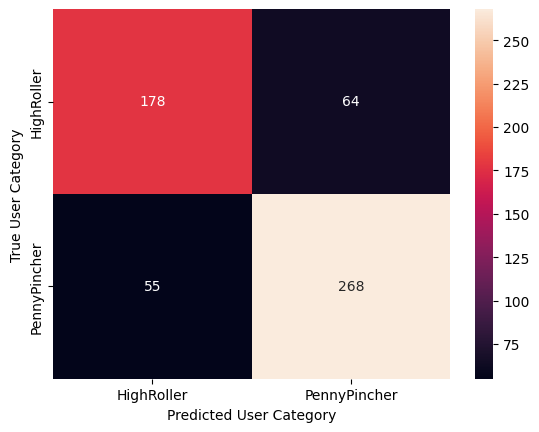

In [126]:
unique_label = np.unique(y_true)
cm = pd.DataFrame(confusion_matrix(y_true, y_pred, labels=unique_label),
                   index=['true:{:}'.format(x) for x in unique_label],
                   columns=['pred:{:}'.format(x) for x in unique_label])

sns.heatmap(cm, annot=True,fmt='',
         xticklabels = ["HighRoller", "PennyPincher"] , yticklabels = ["HighRoller", "PennyPincher"] )

plt.ylabel('True User Category')
plt.xlabel('Predicted User Category')

Bên trên là quy trình phân loại người dùng bằng Decision Tree để xác định những người có khả năng chi nhiều tiền trong trò chơi \
Bằng cách sử dụng tệp “combined-data.csv”, chúng ta đã xác định hai loại giá:
* HighRollers, những người trung bình chi hơn 5,00 đô la để mua các mặt hàng và PennyPinchers,
* Những người chi trung bình 5,00 đô la trở xuống để mua các mặt hàng đó.

**Recommendations**
* Đề xuất thêm sản phẩm cho người dùng iPhone vì đây là nhóm người dùng chi tiền nhiều nhất.
* Đề xuất thêm một số khuyến mãi cho PennyPinchers để thu hút sự tiêu dùng.


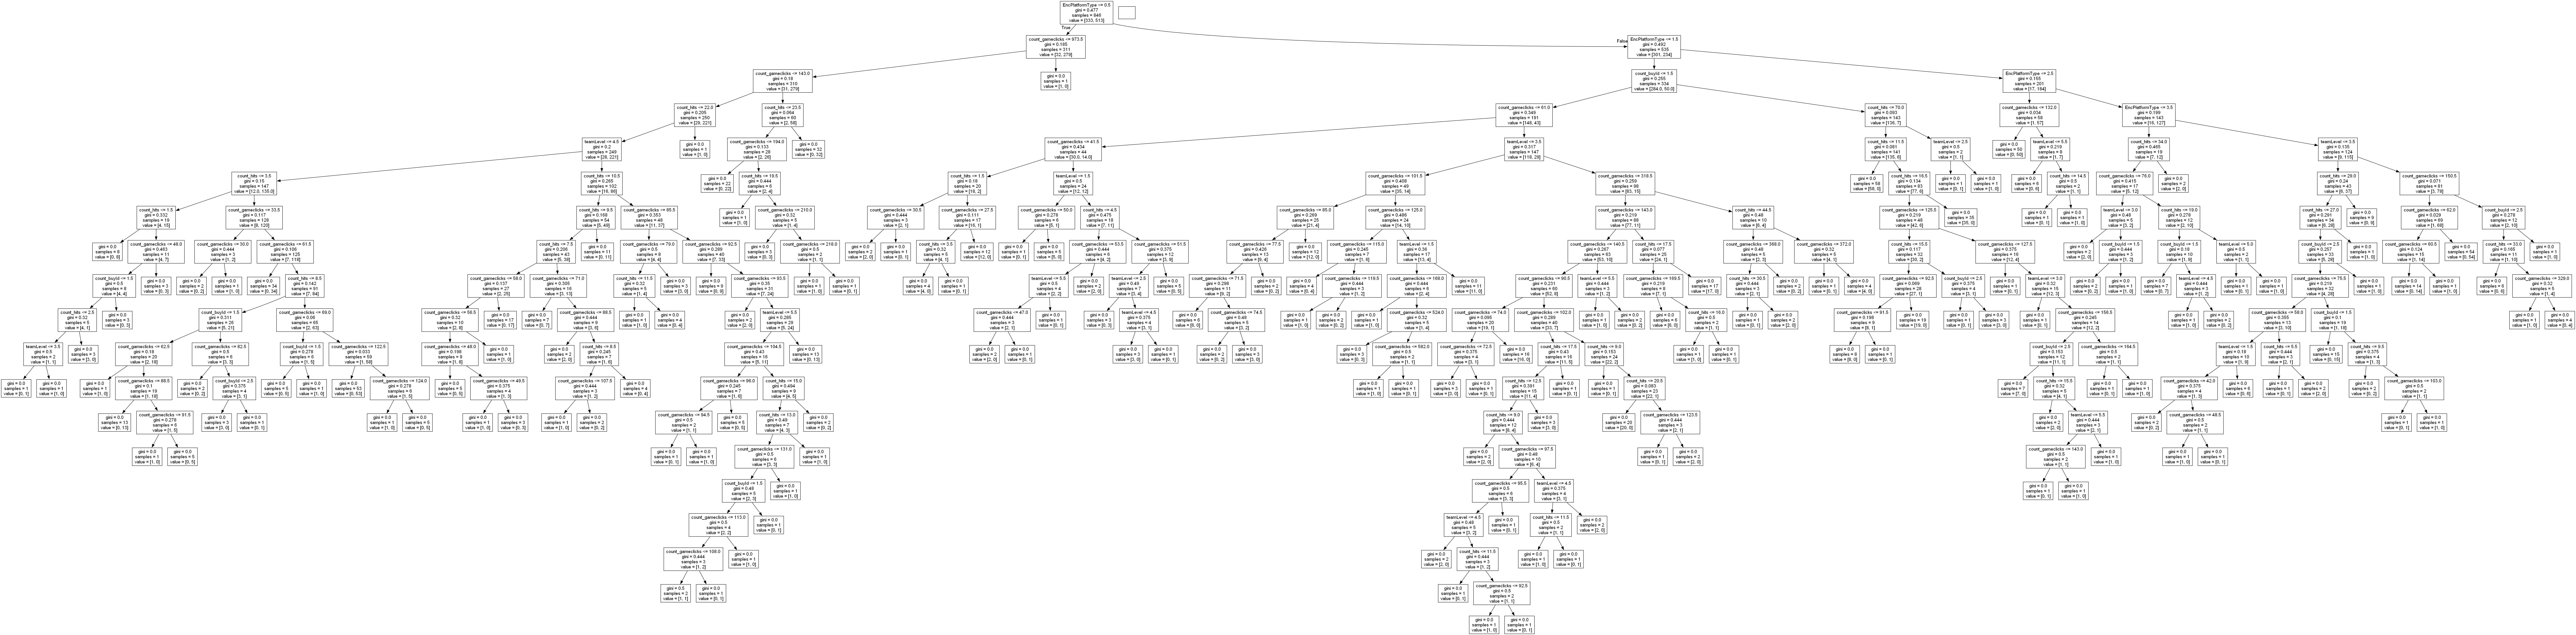

In [ ]:
import pydotplus as pdot
from sklearn.tree import export_graphviz

export_graphviz( clf1,
              out_file = "pinkFlamingo_tree.dot",
              feature_names = X.columns )

chd_tree_graph = pdot.graphviz.graph_from_dot_file( 'pinkFlamingo_tree.dot' )
chd_tree_graph.write_jpg( 'pinkFlamingo_tree.jpg' )

from IPython.display import Image
Image(filename='pinkFlamingo_tree.jpg')